# Introduce regularisation to the cnn model

To do that, we first need to evaluate the testing loss.

Hence, we introduce the validation subset. This subset is used to test the model during the training process, so that we can tract 'test' loss over each epoch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load the dataset, split into train, val, test subsets

In [2]:
(train_img, train_lbl), (test_img, test_lbl) = tf.keras.datasets.fashion_mnist.load_data()

train_img.shape

(60000, 28, 28)

In [3]:
val_img = train_img[50000:]
val_lbl = train_lbl[50000:]

train_img = train_img[:50000]
train_lbl = train_lbl[:50000]

In [4]:
print(train_img.shape)
print(val_img.shape)
print(test_img.shape)

print(train_lbl.shape)
print(val_lbl.shape)
print(test_lbl.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)
(10000,)


In [5]:
train_img = train_img/255
val_img = val_img/255
test_img = test_img/255

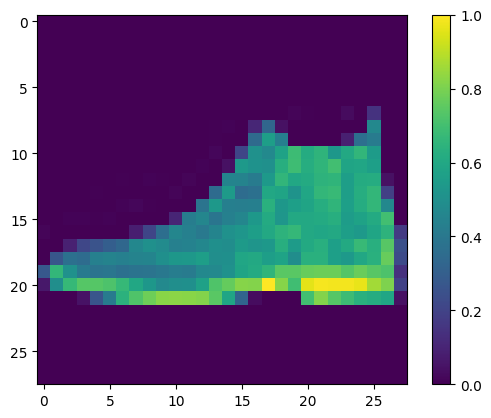

In [6]:
plt.figure()
plt.imshow(test_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

* * *

## Model (No Regularisation)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten

In [8]:
model_cnn = tf.keras.Sequential()

In [9]:
model_cnn.add(Conv2D(128, kernel_size=(2,2), input_shape=(28, 28, 1), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(10))

In [10]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
hist_cnn = model_cnn.fit(train_img, train_lbl, validation_data=(val_img, val_lbl), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.3932 - accuracy: 0.8609 - val_loss: 0.3451 - val_accuracy: 0.8721
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.2776 - accuracy: 0.9014 - val_loss: 0.2981 - val_accuracy: 0.8954
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2324 - accuracy: 0.9172 - val_loss: 0.3047 - val_accuracy: 0.8937
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2015 - accuracy: 0.9268 - val_loss: 0.3038 - val_accuracy: 0.8964
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.1778 - accuracy: 0.9360 - val_loss: 0.3015 - val_accuracy: 0.9005
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.1579 - accuracy: 0.9426 - val_loss: 0.3392 - val_accuracy: 0.8908
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.1392 - accuracy: 0.9498 - val_loss: 0.3449 -

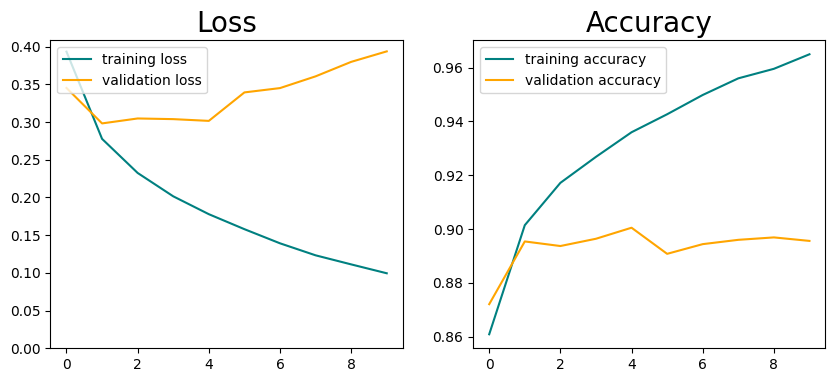

In [12]:
fig1 = plt.figure(figsize = (10,4))

ax2 = fig1.add_subplot(121)
ax2.plot(hist_cnn.history['loss'], color='teal', label='training loss')
ax2.plot(hist_cnn.history['val_loss'], color='orange', label='validation loss')
ax2.set_title('Loss', fontsize=20)
ax2.set_ylim(bottom=0)
ax2.legend(loc="upper left")

ax3 = fig1.add_subplot(122)
ax3.plot(hist_cnn.history['accuracy'], color='teal', label='training accuracy')
ax3.plot(hist_cnn.history['val_accuracy'], color='orange', label='validation accuracy')
ax3.set_title('Accuracy', fontsize=20)
ax3.legend(loc="upper left")

plt.show()

It can be seen that validation loss starts to increase somewhere after one epoch. That is when the model learning begins to overfit.

Hence, need to introduce 'stop loss' method

* * *

## EarlyStop Callback Model

Introduce EarlyStop callback to the model

In [7]:
EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)

In [10]:
EarlyStop_cnn = tf.keras.Sequential()

EarlyStop_cnn.add(Conv2D(128, kernel_size=(2,2), input_shape=(28, 28, 1), activation='relu'))
EarlyStop_cnn.add(Flatten())
EarlyStop_cnn.add(Dense(10))

EarlyStop_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
EarlyStop_hist = EarlyStop_cnn.fit(train_img, train_lbl, validation_data=(val_img, val_lbl), epochs=10, callbacks=EarlyStop)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3962 - accuracy: 0.8599 - val_loss: 0.3076 - val_accuracy: 0.8894
Epoch 2/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2743 - accuracy: 0.9009 - val_loss: 0.3028 - val_accuracy: 0.8962
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2314 - accuracy: 0.9167 - val_loss: 0.2946 - val_accuracy: 0.8960
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2000 - accuracy: 0.9281 - val_loss: 0.3099 - val_accuracy: 0.8965


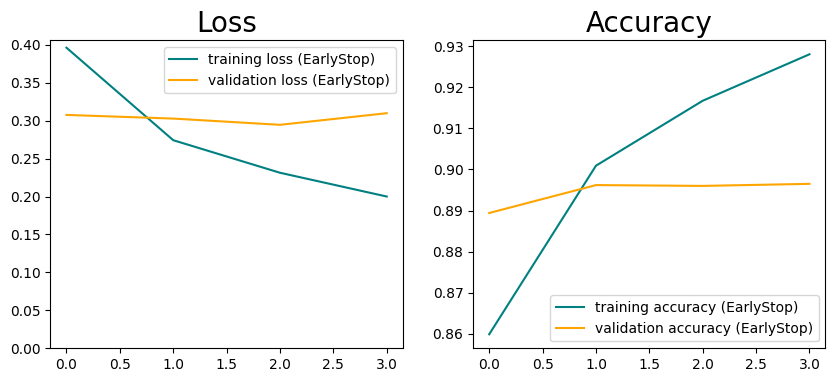

In [15]:
fig1 = plt.figure(figsize = (10,4))

ax2 = fig1.add_subplot(121)
ax2.plot(EarlyStop_hist.history['loss'], color='teal', label='training loss (EarlyStop)')
ax2.plot(EarlyStop_hist.history['val_loss'], color='orange', label='validation loss (EarlyStop)')
ax2.set_title('Loss', fontsize=20)
ax2.set_ylim(bottom=0)
ax2.legend(loc="best")

ax3 = fig1.add_subplot(122)
ax3.plot(EarlyStop_hist.history['accuracy'], color='teal', label='training accuracy (EarlyStop)')
ax3.plot(EarlyStop_hist.history['val_accuracy'], color='orange', label='validation accuracy (EarlyStop)')
ax3.set_title('Accuracy', fontsize=20)
ax3.legend(loc="best")

plt.show()

It can be seen that the Early Stop is not the best method for our model since it limits the training accuracy of the model. The best outcome to maximize training accuracy without causing val_loss to increase (and val_accuracy to drop)

* * *

## Further Objectives:

1) $\textbf{OPTIONAL}$ Try other regularisation methods (L1, L2, DropOut, BatchNormalisation) 

2) Implement Data Augmentation

    2.1. Use Google Colab or set up local GPU for that, since Data Augmentation implies even larger dataset